# Chennai House Price Predictor 
                                                     Project by: Love Fadia 

## Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


#Dataset Source: https://www.kaggle.com/ruchi798/housing-prices-in-metropolitan-areas-of-india?select=Chennai.csv

In [27]:
df=pd.read_csv("Chennai.csv")
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


# Data Cleaning 

In [29]:
df['Location'].value_counts()

Medavakkam         230
Ambattur           195
Sholinganallur     177
Karapakkam         161
Iyappanthangal     158
                  ... 
Irandankattalai      1
Tharapakkam          1
Purasaiwakkam        1
Shanthi Nagar        1
Mangadu              1
Name: Location, Length: 185, dtype: int64

### Removing those rows whose value count is 1 

In [31]:
list1=df['Location'].value_counts().index.tolist()
print(list1)

['Medavakkam', 'Ambattur', 'Sholinganallur', 'Karapakkam', 'Iyappanthangal', 'Nanmangalam', 'Avadi', 'Navallur', 'Mogappair', 'Selaiyur', 'Perumbakkam', 'Thoraipakkam OMR', 'Madipakkam', 'Pammal', 'Vadapalani', 'Pallikaranai', 'Porur', 'Kovur', 'Kovilambakkam', 'Anna Nagar', 'Madambakkam', 'Korattur', 'Padur', 'Poonamallee', 'Kolapakkam', 'Kelambakkam', 'Thiruvanmiyur', 'Ayanambakkam', 'Velachery', 'Thiruverkadu', 'Chromepet', 'tambaram west', 'Perungalathur', 'Kilkattalai', 'Moolacheri', 'Mugalivakkam', 'Pallavaram', 'Kolathur', 'Nungambakkam', 'Thalambur', 'Sunnambu Kolathur S Kolathur', 'Guduvancheri', 'Perungudi', 'Manapakkam', 'Maduravoyal', 'Raja Annamalai Puram', 'Adyar', 'Egmore', 'Iyyappanthangal', 'Pozhichalur', 'Sembakkam', 'Vengaivasal', 'Sithalapakkam', 'Kanathur Reddikuppam', 'Alwarpet', 'Manikandan Nagar', 'Rajakilpakkam', 'Kundrathur', 'Vandalur', 'Ullagaram', 'T Nagar', 'Kattupakkam', 'Choolaimedu', 'Velappanchavadi', 'Valasaravakkam', 'Mevalurkuppam', 'Perambur', 'Mar

In [33]:
sum(df.Location.value_counts() ==1)

30

In [35]:
len(list1)
list2=[]
for i in range(154,185):
    list2.append(list1[i])
list2

['Irumbuliyur',
 'Nenmeli',
 'Egattur',
 'tambaram east',
 'Nandanam',
 'Abiramapuram',
 'Shenoy Nagar',
 'Manali',
 'Annanagar',
 'Ottiyambakkam',
 'Thiruneermalai',
 'Chikkarayapuram',
 'Thirumudivakkam',
 'Ayanavaram',
 'Pallikaranai VGP Shanti Nagar',
 'Royapuram',
 'Injambakkam',
 'GST Road',
 'CIT Nagar',
 'Anna Nagar East',
 'Serapanacheri',
 'Ashok Nagar',
 '200 Feet Radial Road',
 'Pudupakkam',
 'Ponniammanmedu',
 'Keelma Nagar',
 'Irandankattalai',
 'Tharapakkam',
 'Purasaiwakkam',
 'Shanthi Nagar',
 'Mangadu']

In [37]:
for x in list2:
    
    df.drop(df[df['Location'] == x].index, inplace = True)

In [39]:
sum(df.Location.value_counts() ==1)

0

In [41]:
df.isnull().sum().any()

False

In [43]:
df['No. of Bedrooms'].value_counts()

2    2648
3    1702
1     390
4     227
5      15
Name: No. of Bedrooms, dtype: int64

In [45]:
 df.drop(df[df['No. of Bedrooms'] == 5].index, inplace = True)

In [47]:
df['BED'].value_counts() #9 here shows that the value is not available for this critera

9    2747
0    2182
1      38
Name: BED, dtype: int64

In [49]:
df.drop('BED',
  axis='columns', inplace=True)

In [51]:
corr_matrix = df.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                  1.000000
Area                   0.405140
No. of Bedrooms        0.294697
Resale                 0.088896
Gymnasium              0.062709
SwimmingPool           0.061566
PowerBackup            0.059816
LandscapedGardens      0.059087
ClubHouse              0.058651
Children'splayarea     0.058443
Intercom               0.058254
24X7Security           0.056348
IndoorGames            0.054760
SportsFacility         0.054522
CarParking             0.053804
LiftAvailable          0.053572
RainWaterHarvesting    0.052620
Gasconnection          0.052565
JoggingTrack           0.052323
VaastuCompliant        0.052307
MultipurposeRoom       0.051839
Cafeteria              0.051585
Sofa                   0.051378
WashingMachine         0.051170
DiningTable            0.050878
Microwave              0.050856
AC                     0.050828
ShoppingMall           0.050455
StaffQuarter           0.050368
Refrigerator           0.050257
TV                     0.050106
Maintena

### Droping these columns because of lower correlation value

In [53]:
df.drop(['VaastuCompliant','MultipurposeRoom','Cafeteria','Sofa','WashingMachine','DiningTable','Microwave','AC','ShoppingMall','StaffQuarter','Refrigerator','TV','MaintenanceStaff','Hospital','School','Wifi','GolfCourse',           
'Wardrobe','ATM'],axis=1, inplace=True)

In [55]:
df['Gymnasium'].value_counts()

9    2747
0    1114
1    1106
Name: Gymnasium, dtype: int64

In [57]:
df['SwimmingPool'].value_counts()

9    2747
0    1378
1     842
Name: SwimmingPool, dtype: int64

In [59]:
df["JoggingTrack"].value_counts()

9    2747
0    1566
1     654
Name: JoggingTrack, dtype: int64

In [ ]:
### We have to drop columns because the 50% of data in that columns were empty and they are not having high correlation value 

In [61]:
df.drop(['JoggingTrack','SwimmingPool','PowerBackup','Gymnasium','LandscapedGardens','ClubHouse',"Children'splayarea",'Intercom','24X7Security','IndoorGames','SportsFacility','CarParking','LiftAvailable','RainWaterHarvesting','Gasconnection' ],axis=1,inplace=True)

In [63]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,Location_code
0,5500000,1310,Perungalathur,3,0,97.0
1,5350000,1126,Madhavaram,2,0,60.0
2,8205000,1307,Karapakkam,3,0,40.0
3,23400000,3600,Thiruvidandhai,3,0,130.0
4,10100000,1700,Iyappanthangal,3,0,35.0


# Data Visualization

<AxesSubplot:xlabel='No. of Bedrooms', ylabel='count'>

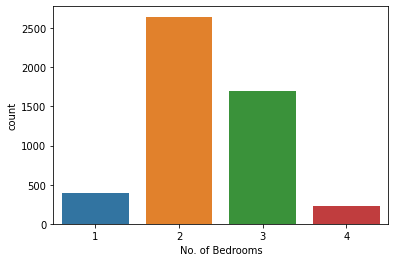

In [64]:
sns.countplot(data=df,x="No. of Bedrooms")

In [65]:
numerical_data=['Price','Area','No. of Bedrooms','Resale']
categorical_data=['Location']


<AxesSubplot:xlabel='No. of Bedrooms', ylabel='Price'>

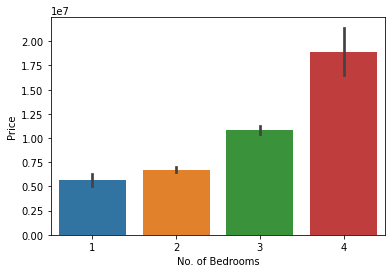

In [66]:
sns.barplot(x=df["No. of Bedrooms"],y=df["Price"])

<Figure size 1080x1080 with 0 Axes>

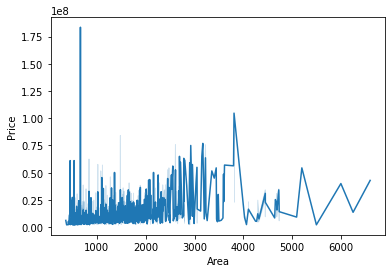

<Figure size 1080x1080 with 0 Axes>

In [67]:
sns.lineplot(x=df["Area"],y=df["Price"])
plt.figure(figsize=(15,15))

<AxesSubplot:xlabel='Resale', ylabel='Price'>

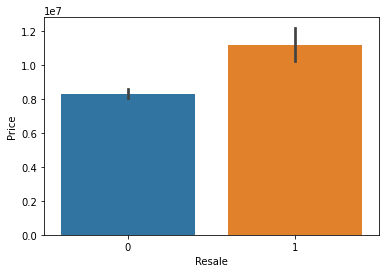

In [68]:
sns.barplot(x=df["Resale"],y=df["Price"])

<AxesSubplot:xlabel='Resale', ylabel='count'>

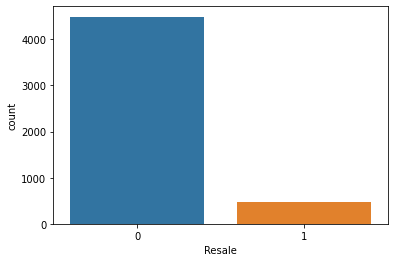

In [69]:
sns.countplot(data=df,x="Resale")

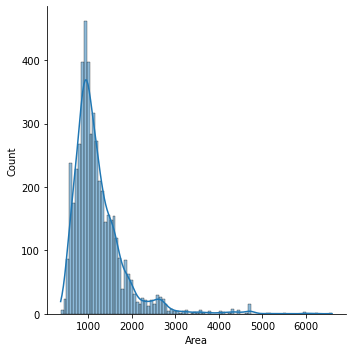

In [70]:
sns.displot(data=df,x='Area',kde=True)

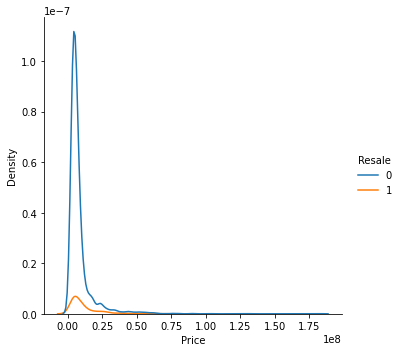

In [71]:
sns.displot(data=df,x="Price",hue="Resale",kind="kde")

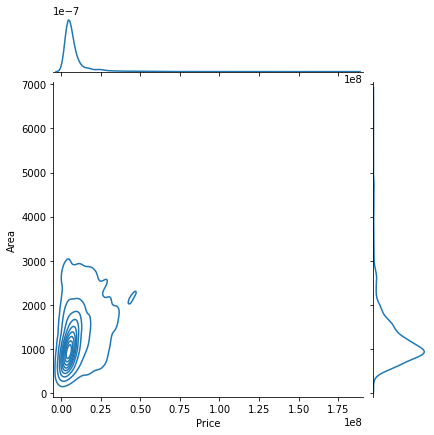

In [72]:
sns.jointplot(y=df['Area'],x=df["Price"],kind="kde")

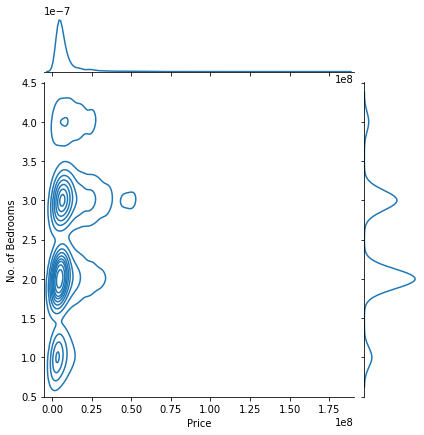

In [73]:
sns.jointplot(y=df['No. of Bedrooms'],x=df["Price"],kind="kde")

### From the analysis we can say that:
#### Price of houses which have 1 or 2 Bedrooms differs in less amount

#### There is a gradual noticible change(exponential change) in price of houses having 2,3 or 4 Bedrooms

#### There is a spike in price even though the area of the house is less because of posh location

#### The price of house depends on area and location of house 


## Ordinal Coding for Categorical Values

In [74]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["Location_code"] = ord_enc.fit_transform(df[["Location"]])
df[["Location", "Location_code"]].head(11)

,Location,Location_code
0,Perungalathur,97.0
1,Madhavaram,60.0
2,Karapakkam,40.0
3,Thiruvidandhai,130.0
4,Iyappanthangal,35.0
5,Mevalurkuppam,71.0
6,Kolapakkam,48.0
7,Kundrathur,57.0
8,Pammal,91.0
9,Puzhal,104.0


In [75]:
New_data=df.copy()
df.to_csv("New")

In [76]:
New_data.head()

,Price,Area,Location,No. of Bedrooms,Resale,Location_code
0,5500000,1310,Perungalathur,3,0,97.0
1,5350000,1126,Madhavaram,2,0,60.0
2,8205000,1307,Karapakkam,3,0,40.0
3,23400000,3600,Thiruvidandhai,3,0,130.0
4,10100000,1700,Iyappanthangal,3,0,35.0


In [77]:
New_data.drop("Location",axis="columns",inplace=True)


### Train set - Test set splitting

In [78]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(New_data, test_size=0.2, random_state=42)
train_set

,Price,Area,No. of Bedrooms,Resale,Location_code
2431,5737000,927,2,0,6.0
2230,11000000,1200,3,1,52.0
2428,20000000,1215,3,0,10.0
80,9086000,1298,3,0,143.0
808,3195000,841,2,0,14.0
...,...,...,...,...,...
4463,15500000,1479,3,0,139.0
469,2675000,677,2,0,14.0
3111,6096000,881,2,0,111.0
3802,5965000,721,2,0,6.0


In [79]:
y_train=train_set.Price
y_test=test_set.Price

In [80]:
train_set.drop("Price",axis=1)
test_set.drop("Price",axis=1)
X_train=train_set
X_test=test_set



In [81]:
X_train

,Price,Area,No. of Bedrooms,Resale,Location_code
2431,5737000,927,2,0,6.0
2230,11000000,1200,3,1,52.0
2428,20000000,1215,3,0,10.0
80,9086000,1298,3,0,143.0
808,3195000,841,2,0,14.0
...,...,...,...,...,...
4463,15500000,1479,3,0,139.0
469,2675000,677,2,0,14.0
3111,6096000,881,2,0,111.0
3802,5965000,721,2,0,6.0


# Model Training

### Random Forest Regressor

In [87]:
from sklearn.linear_model import LinearRegression
my_model= LinearRegression()
my_model.fit(X_train,y_train)

LinearRegression()

##### Prediction and Testing on Test set

In [88]:
predict=my_model.predict(X_test)

In [84]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predict,y_test)

84864.92521989076

#### Prediction and Testing on Training set

In [89]:
predict1=my_model.predict(X_train)

In [90]:
mean_absolute_error(predict1,y_train)

3.3424939822406516e-09